In [1]:
# This is the import cell
import sys
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
os.chdir(parent)

# Grab file names from data folder
data = os.listdir('data')
try:
    data.remove('.DS_Store')
except:
    pass
print(data)

['active_pe500.0_lattice0.96.txt', 'active_pe200.0_lattice0.93.txt', 'pe200.0_lattice0.95.txt', 'active_pe300.0_lattice1.05.txt', 'active_pe100.0_lattice0.85.txt', 'active_pe100.0_lattice0.91.txt', 'active_pe125.0_lattice0.98.txt', 'pe300.0_lattice0.9.txt', 'active_pe300.0_lattice0.92.txt', 'active_pe400.0_lattice0.97.txt', 'active_pe300.0_lattice1.0.txt', 'pe400.0_lattice0.85.txt', 'pe50.0_lattice0.95.txt', 'pe300.0_lattice0.95.txt', 'active_pe200.0_lattice1.05.txt', 'active_pe400.0_lattice0.96.txt', 'pe300.0_lattice0.8.txt', 'active_pe300.0_lattice0.93.txt', 'active_pe125.0_lattice0.99.txt', 'pe400.0_lattice1.0.txt', 'pe500.0_lattice0.85.txt', 'active_pe200.0_lattice0.92.txt', 'active_pe400.0_lattice0.9.txt', 'active_pe500.0_lattice0.97.txt', 'active_pe500.0_lattice0.95.txt', 'active_pe225.0_lattice0.99.txt', 'active_pe100.0_lattice0.92.txt', 'active_pe300.0_lattice0.91.txt', 'active_pe300.0_lattice0.85.txt', 'active_pe400.0_lattice0.94.txt', 'active_pe325.0_lattice0.98.txt', 'pe350.

In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in xrange(1, len(string)):
                if fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
            for j in xrange(1, len(string)):
                if fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]      
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
print(data[0])
print(checkFile(data[0], "active"))

active_pe500.0_lattice0.96.txt
True


In [5]:
# Grab parameters, sort them
actList = []
peList = []
latList = []

for i in xrange(len(data)):
    if checkFile(data[i], "active"):
        actList.append(1)
    else:
        actList.append(0)
        
    if checkFile(data[i], "pe"):
        peList.append(txtValue(data[i], "pe"))
    else:
        peList.append(0)
    
    if checkFile(data[i], "lattice"):
        latList.append(txtValue(data[i], "lattice"))
    else:
        latList.append(0)

# # Take a look at your lists
# print(actList)
# print(peList)
# print(latList)        

# Sort the arrays
if len(peList) > 1:
    # Sort them!
    print("Sorting... ")
    indArr = multiSort(actList, peList, latList)
    indSort(data, indArr)
    indSort(peList, indArr)
    indSort(latList, indArr)
    indSort(actList, indArr)

# Print the sorted array
print("Sorted textfiles:")
for i in data:
    print(i)
    
# Now that the data is sorted, read it into a dataframe
all_data = []
os.chdir('data')
for i in xrange(len(data)):
    df = pd.read_csv(data[i], sep='\s+', header=0)
    all_data.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_data[0])
# print(all_data[0]['Timestep'])
# print(all_data[0]['Timestep'][0])

Sorting... 
Sorted textfiles:
pe50.0_lattice0.75.txt
pe50.0_lattice0.8.txt
pe50.0_lattice0.85.txt
pe50.0_lattice0.9.txt
pe50.0_lattice0.95.txt
pe50.0_lattice1.0.txt
pe100.0_lattice0.75.txt
pe100.0_lattice0.8.txt
pe100.0_lattice0.85.txt
pe100.0_lattice0.9.txt
pe100.0_lattice0.95.txt
pe100.0_lattice1.0.txt
pe150.0_lattice0.75.txt
pe150.0_lattice0.8.txt
pe150.0_lattice0.85.txt
pe150.0_lattice0.9.txt
pe150.0_lattice0.95.txt
pe150.0_lattice1.0.txt
pe200.0_lattice0.75.txt
pe200.0_lattice0.8.txt
pe200.0_lattice0.85.txt
pe200.0_lattice0.9.txt
pe200.0_lattice0.95.txt
pe200.0_lattice1.0.txt
pe250.0_lattice0.75.txt
pe250.0_lattice0.8.txt
pe250.0_lattice0.85.txt
pe250.0_lattice0.9.txt
pe250.0_lattice0.95.txt
pe250.0_lattice1.0.txt
pe300.0_lattice0.75.txt
pe300.0_lattice0.8.txt
pe300.0_lattice0.85.txt
pe300.0_lattice0.9.txt
pe300.0_lattice0.95.txt
pe300.0_lattice1.0.txt
pe350.0_lattice0.75.txt
pe350.0_lattice0.8.txt
pe350.0_lattice0.85.txt
pe350.0_lattice0.9.txt
pe350.0_lattice0.95.txt
pe350.0_latt

,Activity,Lattice,Infiltrate,Velocity
0,50.0,0.75,n,0.0


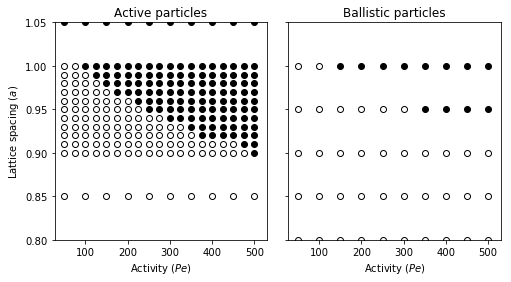

In [6]:
# Plot as filled or unfilled points
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
for i in xrange(len(all_data)):
    # If active...
    if actList[i]:
        if all_data[i]['Infiltrate'][0] == 'y':
            ax[0].scatter(peList[i], latList[i], facecolors='k', edgecolors='k')
        else:
            ax[0].scatter(peList[i], latList[i], facecolors='w', edgecolors='k')
    # Else ballistic
    else:
        if all_data[i]['Infiltrate'][0] == 'y':
            ax[1].scatter(peList[i], latList[i], facecolors='k', edgecolors='k')
        else:
            ax[1].scatter(peList[i], latList[i], facecolors='w', edgecolors='k')

ax[0].set_ylim(0.8, 1.05)
ax[1].set_ylim(0.8, 1.05)
ax[0].set_xlabel(r'Activity $(Pe)$')
ax[1].set_xlabel(r'Activity $(Pe)$')
ax[0].set_ylabel(r'Lattice spacing $(a)$')
ax[0].set_title('Active particles')
ax[1].set_title('Ballistic particles')
plt.subplots_adjust(wspace=0.1)
plt.show()

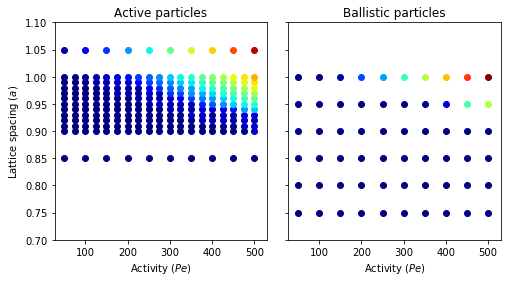

In [7]:
# Get maximum velocity
vel = []
for i in xrange(len(all_data)):
    vel.append(all_data[i]['Velocity'][0])
maxV = max(vel)

# Now let's plot the velocity as a heatmap?
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
for i in xrange(len(all_data)):
    # If active...
    if actList[i]:
        if all_data[i]['Infiltrate'][0] == 'y':
            ax[0].scatter(peList[i], latList[i], c=plt.cm.jet((vel[i])/maxV))
        else:
            ax[0].scatter(peList[i], latList[i], c=plt.cm.jet((vel[i])/maxV))
    # Else ballistic
    else:
        if all_data[i]['Infiltrate'][0] == 'y':
            ax[1].scatter(peList[i], latList[i], c=plt.cm.jet((vel[i])/maxV))
        else:
            ax[1].scatter(peList[i], latList[i], c=plt.cm.jet((vel[i])/maxV))

ax[0].set_ylim(0.7, 1.1)
ax[1].set_ylim(0.7, 1.1)
ax[0].set_xlabel(r'Activity $(Pe)$')
ax[1].set_xlabel(r'Activity $(Pe)$')
ax[0].set_ylabel(r'Lattice spacing $(a)$')
ax[0].set_title('Active particles')
ax[1].set_title('Ballistic particles')
plt.subplots_adjust(wspace=0.1)
plt.show()

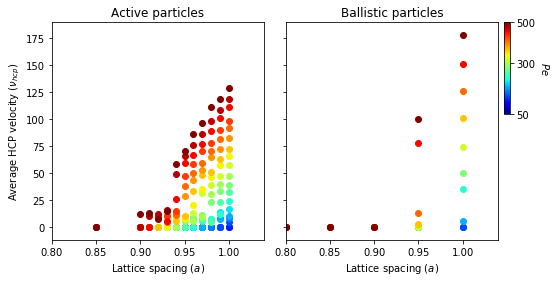

In [8]:
# Let's plot lines on velocity vs lattice and velocity vs activity
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
maxPe = max(peList)
for i in xrange(len(all_data)):
    if actList[i]:
        ax[0].scatter(latList[i], all_data[i]['Velocity'][0], c=plt.cm.jet(peList[i]/maxPe))
    else:
        ax[1].scatter(latList[i], all_data[i]['Velocity'][0], c=plt.cm.jet(peList[i]/maxPe))
        
ax[0].set_xlim(0.8, 1.04)
ax[1].set_xlim(0.8, 1.04)
ax[0].set_xlabel(r'Lattice spacing $(a)$')
ax[1].set_xlabel(r'Lattice spacing $(a)$')
ax[0].set_ylabel(r'Average HCP velocity $(\nu_{hcp})$')
ax[0].set_title('Active particles')
ax[1].set_title('Ballistic particles')
plt.subplots_adjust(wspace=0.1)

# Make a colorbar (left, bottom, width, height)
ax3 = fig.add_axes([0.91, 0.562, 0.01, 0.32])
jet_trunc = mpl.cm.jet
norm = mpl.colors.Normalize(vmin=50, vmax=500)
cb1 = mpl.colorbar.ColorbarBase(ax3, cmap=jet_trunc,
                                norm=norm,
                                orientation='vertical',
                               ticks=[50, 300, 500])
cb1.set_label(r'$Pe$', labelpad=15, rotation=270)

plt.show()

[0.85, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.05]
Lattice spacing: 0.85, gives area fraction: 1.30171426883
Lattice spacing: 0.9, gives area fraction: 1.16109698671
Lattice spacing: 0.91, gives area fraction: 1.13571858379
Lattice spacing: 0.92, gives area fraction: 1.11116323161
Lattice spacing: 0.93, gives area fraction: 1.08739572116
Lattice spacing: 0.94, gives area fraction: 1.06438270624
Lattice spacing: 0.95, gives area fraction: 1.04209258641
Lattice spacing: 0.96, gives area fraction: 1.02049539847
Lattice spacing: 0.97, gives area fraction: 0.999562715732
Lattice spacing: 0.98, gives area fraction: 0.979267554386
Lattice spacing: 0.99, gives area fraction: 0.959584286535
Lattice spacing: 1.0, gives area fraction: 0.940488559233
Lattice spacing: 1.05, gives area fraction: 0.853050847376


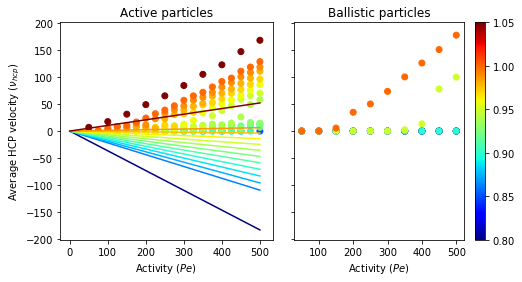

In [43]:
# Let's plot lines on velocity vs lattice and velocity vs activity
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
maxLat = max(latList)

def rhoNu(v0, phi):
    return v0 * (1. - (1.05*phi))

def cirArea(sigma):
    return ( np.pi * ((sigma/2.)**2) )

# def hexArea(lat):
#     return ( (3. * np.sqrt(3.)) / 2. ) * (lat**2)

def hexArea(lat):
    '''A regular hexagon is six equilateral triangles'''
    side = (3. * lat / 2.)
    return 6. * (np.sqrt(3.) / 4.) * (side**2)

# Lists
actPes = []
actVels = []
actLats = []
balPes = []
balVels = []
balLats = []

uniqueLat = []
for i in xrange(len(all_data)):
    if latList[i] not in uniqueLat and actList[i]:
        uniqueLat.append(latList[i])

theory = [ [] for x in xrange(len(uniqueLat))]
xs = np.arange(0., 500., 0.001)
for i in xrange(len(uniqueLat)):
    phi = 7. * (cirArea(1.) / hexArea(uniqueLat[i]))
    print"Lattice spacing: {}, gives area fraction: {}".format(uniqueLat[i], phi)
    theory[i].append(rhoNu(xs, phi))
    color = (uniqueLat[i] - min(uniqueLat)) / (max(uniqueLat) - min(uniqueLat))
    ax[0].plot(xs, rhoNu(xs, phi), c=plt.cm.jet(color))

for i in xrange(len(all_data)):
    if actList[i]:
        actPes.append(peList[i])
        actVels.append(all_data[i]['Velocity'][0])
        actLats.append(latList[i])
#         ax[0].scatter(peList[i], all_data[i]['Velocity'][0], c=plt.cm.jet(latList[i]/maxLat))
    else:
        balPes.append(peList[i])
        balVels.append(all_data[i]['Velocity'][0])
        balLats.append(latList[i])
#         ax[1].scatter(peList[i], all_data[i]['Velocity'][0], c=plt.cm.jet(latList[i]/maxLat))

sc1 = ax[0].scatter(actPes, actVels, c=actLats, cmap='jet', vmin=0.8, vmax=1.05)
sc2 = ax[1].scatter(balPes, balVels, c=balLats, cmap='jet', vmin=0.8, vmax=1.05)
plt.colorbar(sc1)
ax[0].set_xlabel(r'Activity $(Pe)$')
ax[1].set_xlabel(r'Activity $(Pe)$')
ax[0].set_ylabel(r'Average HCP velocity $(\nu_{hcp})$')
ax[0].set_title('Active particles')
ax[1].set_title('Ballistic particles')
plt.subplots_adjust(wspace=0.1)
plt.show()

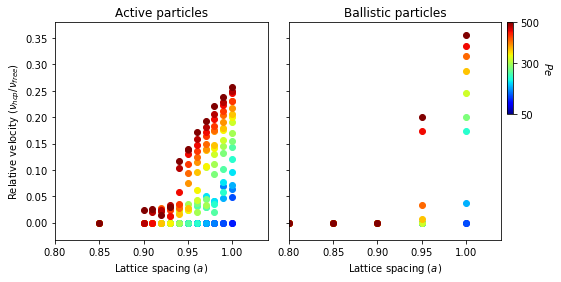

In [11]:
# Plot these same things relative to the free velocity
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
maxPe = max(peList)
for i in xrange(len(all_data)):
    if actList[i]:
        ax[0].scatter(latList[i], all_data[i]['Velocity'][0] / peList[i], c=plt.cm.jet(peList[i]/maxPe))
    else:
        ax[1].scatter(latList[i], all_data[i]['Velocity'][0] / peList[i], c=plt.cm.jet(peList[i]/maxPe))
        
ax[0].set_xlim(0.8, 1.04)
ax[1].set_xlim(0.8, 1.04)
ax[0].set_xlabel(r'Lattice spacing $(a)$')
ax[1].set_xlabel(r'Lattice spacing $(a)$')
ax[0].set_ylabel(r'Relative velocity $(\nu_{hcp}/\nu_{free})$')
ax[0].set_title('Active particles')
ax[1].set_title('Ballistic particles')
plt.subplots_adjust(wspace=0.1)

# Make a colorbar (left, bottom, width, height)
ax3 = fig.add_axes([0.91, 0.562, 0.01, 0.32])
jet_trunc = mpl.cm.jet
norm = mpl.colors.Normalize(vmin=50, vmax=500)
cb1 = mpl.colorbar.ColorbarBase(ax3, cmap=jet_trunc,
                                norm=norm,
                                orientation='vertical',
                               ticks=[50, 300, 500])
cb1.set_label(r'$Pe$', labelpad=15, rotation=270)

plt.show()

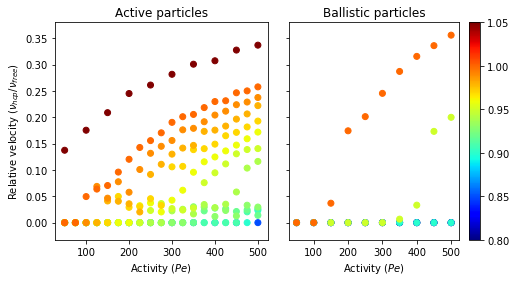

In [12]:
# Let's plot lines on velocity vs lattice and velocity vs activity
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
maxLat = max(latList)

# Lists
actPes = []
actVels = []
actLats = []
balPes = []
balVels = []
balLats = []

for i in xrange(len(all_data)):
    if actList[i]:
        actPes.append(peList[i])
        actVels.append(all_data[i]['Velocity'][0] / peList[i])
        actLats.append(latList[i])
#         ax[0].scatter(peList[i], all_data[i]['Velocity'][0], c=plt.cm.jet(latList[i]/maxLat))
    else:
        balPes.append(peList[i])
        balVels.append(all_data[i]['Velocity'][0] / peList[i])
        balLats.append(latList[i])
#         ax[1].scatter(peList[i], all_data[i]['Velocity'][0], c=plt.cm.jet(latList[i]/maxLat))

sc1 = ax[0].scatter(actPes, actVels, c=actLats, cmap='jet', vmin=0.8, vmax=1.05)
sc2 = ax[1].scatter(balPes, balVels, c=balLats, cmap='jet', vmin=0.8, vmax=1.05)
plt.colorbar(sc1)
ax[0].set_xlabel(r'Activity $(Pe)$')
ax[1].set_xlabel(r'Activity $(Pe)$')
ax[0].set_ylabel(r'Relative velocity $(\nu_{hcp}/\nu_{free})$')
ax[0].set_title('Active particles')
ax[1].set_title('Ballistic particles')
plt.subplots_adjust(wspace=0.1)
plt.show()

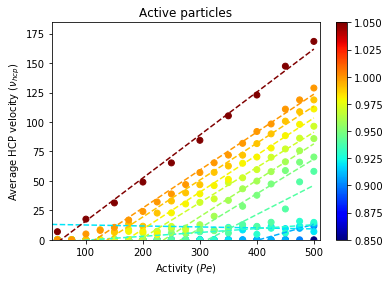

In [67]:
# What is the actual relationship between density and velocity?
from scipy import stats

fig, ax = plt.subplots()
maxLat = max(latList)

def line(x, m, b):
    return (m*x) + b

def cirArea(sigma):
    return ( np.pi * ((sigma/2.)**2) )

def hexArea(lat):
    '''A regular hexagon is six equilateral triangles'''
    side = (3. * lat / 2.)
    return 6. * (np.sqrt(3.) / 4.) * (side**2)

def latToPhi(lat, sigma=1.):
    return 7. * cirArea(sigma) / hexArea(lat)

# Lists to contain slopes, intercepts, lattice spacings
ms = []
bs = []
latFit = []
cols = []

# Get unique lattice values
uniqueLat = []
for i in xrange(len(all_data)):
    if latList[i] not in uniqueLat and actList[i]:
        uniqueLat.append(latList[i])

for i in xrange(len(uniqueLat)):
    xdat = []
    ydat = []
    for j in xrange(len(all_data)):
        # Active particle with matching lattice spacing
        if actList[j] and latList[j] == uniqueLat[i]:
            if all_data[j]['Velocity'][0] > 0.:
                xdat.append(peList[j])
                ydat.append(all_data[j]['Velocity'][0])
    if len(xdat) >= 2:
        slope, intercept, r_value, p_value, std_err = stats.linregress(xdat, ydat)
        ms.append(slope)
        bs.append(intercept)
        latFit.append(uniqueLat[i])
        cols.append((uniqueLat[i] - min(uniqueLat)) / (max(uniqueLat) - min(uniqueLat)))

xs = np.arange(0., 500., 0.0001)
for i in xrange(len(ms)):
    plt.plot(xs, line(xs, ms[i], bs[i]), c=plt.cm.jet(cols[i]), ls='--')

sc1 = ax.scatter(actPes, actVels, c=actLats, cmap='jet', vmin=0.85, vmax=1.05)
plt.colorbar(sc1)
ax.set_xlabel(r'Activity $(Pe)$')
ax.set_ylabel(r'Average HCP velocity $(\nu_{hcp})$')
ax.set_title('Active particles')
ax.set_xlim(40,510)
ax.set_ylim(0,)
plt.show()

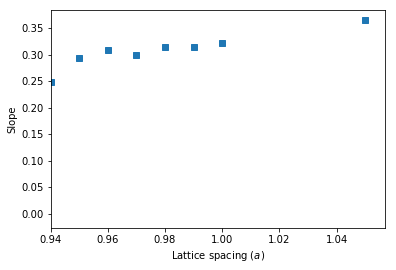

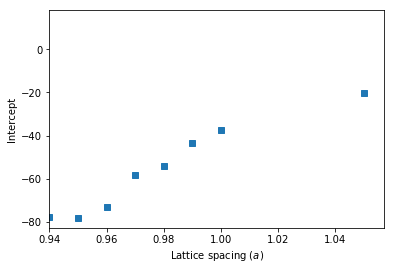

In [78]:
# Plot the slopes and intercepts as a funcion of lattice spacing
plt.plot(latFit, ms, marker='s', ls='')
plt.xlim(left=0.94)
plt.xlabel(r'Lattice spacing $(a)$')
plt.ylabel(r'Slope')
plt.show()

plt.plot(latFit, bs, marker='s', ls='')
plt.xlim(left=0.94)
plt.xlabel(r'Lattice spacing $(a)$')
plt.ylabel(r'Intercept')
plt.show()

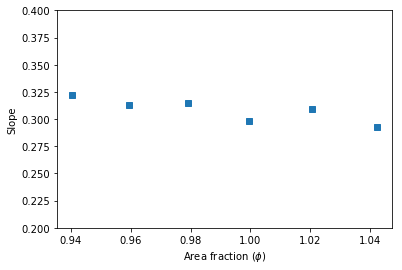

Slope: -419.287145947, intercept: 357.914393299


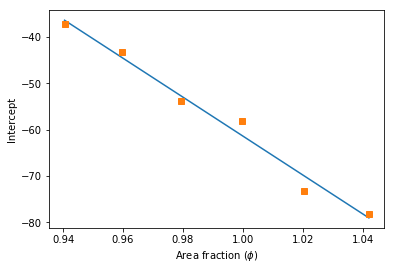

In [112]:
# Get the intercept as a function of the area fraction

# Get indices that I want (reduced)
keepInds = [ i for i in xrange(len(latFit)) if 0.94 < latFit[i] < 1.05 ]
redLat = [ latFit[i] for i in keepInds ]
redms = [ ms[i] for i in keepInds ]
redbs = [ bs[i] for i in keepInds ]

phiFit = []
for i in redLat:
    phiFit.append(latToPhi(i, 1.))

plt.plot(phiFit, redms, marker='s', ls='')
plt.xlabel(r'Area fraction $(\phi)$')
plt.ylabel(r'Slope')
plt.ylim(0.2, 0.4)
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(phiFit, redbs)
xplot = np.arange(min(phiFit), max(phiFit), 0.0001)
plt.plot(xplot, line(xplot, slope, intercept))
print("Slope: {}, intercept: {}").format(slope, intercept)

plt.plot(phiFit, redbs, marker='s', ls='')
plt.xlabel(r'Area fraction $(\phi)$')
plt.ylabel(r'Intercept')
plt.show()

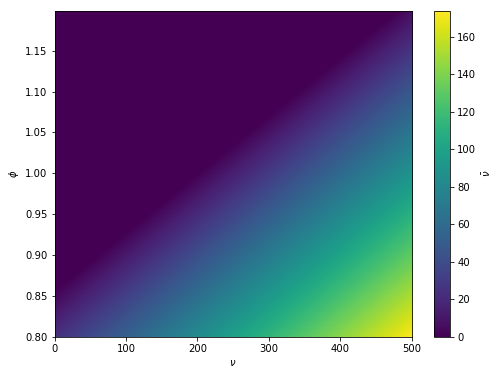

In [130]:
# Combine it all
def nuDense(v0, phi):
    return (0.3 * v0) + (-420.*phi + 360.)

vs = np.arange(0., 500., 0.01)
phis = np.arange(0.8, 1.2, 0.001)

matrix = np.zeros((len(vs), len(phis)), dtype=np.float64)
for i in xrange(len(vs)):
    for j in xrange(len(phis)):
        f = nuDense(vs[i], phis[j])
        if f >= 0.:
            matrix[i][j] = nuDense(vs[i], phis[j])

# Now plot the matrix
fig = plt.figure(figsize=(8, 6))
s = fig.add_subplot(1, 1, 1, xlabel='$\\nu$', ylabel='$\\phi$')
im = s.imshow(matrix.T, extent=(vs[0], vs[-1], phis[0], phis[-1]), origin='lower', aspect='auto')
cbar = fig.colorbar(im)
cbar.set_label(r'$\bar{\nu}$')
plt.show()